<img src="https://www.strath.ac.uk/media/1newwebsite/webteam/logos/xUoS_Logo_Horizontal.png.pagespeed.ic.M6gv_BmDx1.png" width="350" align="left" style="left">

# 3. QAM and QAM Demodulation <a class="anchor" id="QAM"></a>

Quadrature Amplitude Modulation (QAM) is the most common form of modulation in wireless communication, and can be seen in nearly all modern radio communications systems. This scheme utalises trigonometric theory and the principle of orthogonality to transmit two information signals using a single complex carrier. One signal is modulated on a sine wave at $f_{c}$ Hz, and a second signal is independantly modulated on to a cosine wave also at $f_{c}$ Hz (i.e. 90 degrees out of phase, or orthogonal).

## Table of Contents

* [3. QAM and QAM Demodulation](03_QAM_modulation.ipynb)
    * [3.1 QAM Modulation](#QAM_mod)
    * [3.2 QAM Demodulation](#QAM_demod)
    * [3.3 Phase Error With QAM](#QAM_phase_error)

**Import Libraries**

For this notebook we will be using NumPy for computation and MatplotLib for Matlab-like visualisation of our waveforms as well as pystrath_sdr helper functions for plots.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from pystrath_sdr.helper_functions import subplots, multi_subplots, complex_subplots, find_fft

### 3.1 QAM Modulation <a class="anchor" id="QAM_mod"></a>

Quadrature Amplitude Modulation can be used to achieve more bandwidth efficient signalling. Using this approach two signals are transmitted on a single complex carrier. The RF QAM transmitter can be seen in [Figure 1](#fig-1).

<a class="anchor" id="fig-1"></a>
<figure>
<img src='./images/QAM_Mod.png' height='30%' width='30%'/>
    <figcaption><b>Figure 1: QAM Modulation</b></figcaption>
</figure>

First we must establish the parameters which will be used through the notebook. These match those seen in the Amplitude Modulation notebook, with the addition of a second baseband frequency for our second information signal.

In [3]:
fs = 1000000 # sample rate 
fb = 20000 # the frequency of the baseband signal
fb2 = 10000
fc = 300000 # frequency of the carrier signal
A = 200 # baseband signal amplitude
n_window = fs # fft size

In [5]:
samples = np.arange(fs) # the points on the x axis for plotting - 0 to fs
t = samples/fs #samples per sampling rate - amount of time passed to process number of samples - array

freqs = np.fft.fftshift(np.fft.fftfreq(n_window,1/fs)) #frequency domain axis for graphs

We now describe two information signals. For this demonstration, $g_{1}(t)$ is the same tone as used previously, whilst $g_{2}(t)$ is a tone at a lower frequency. In this way, both tones can be transmitted using the same bandwidth as shown in the previous example.

In [6]:
g1 = 200*np.cos(2*np.pi*fb*t)
g2 = 100*np.cos(2*np.pi*fb2*t)

These two signals can be plotted together on time and frequency domains.

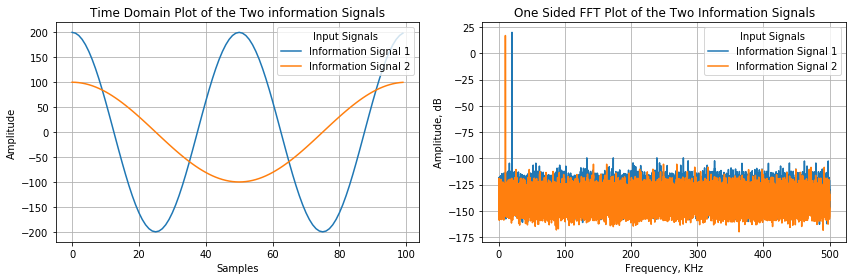

In [7]:
g1_fft_db = find_fft(g1, n_window)
g2_fft_db = find_fft(g2, n_window)

time_title = 'Time Domain Plot of the Two information Signals'
freq_title = 'One Sided FFT Plot of the Two Information Signals'
label_I = 'Information Signal 1'
label_Q = 'Information Signal 2'
legend_title = 'Input Signals'

multi_subplots(g1, g2, g1_fft_db, g2_fft_db, samples, freqs, fs, time_title, freq_title, label_I, label_Q, legend_title)

These two information signals are mixed using quadrature carriers to give modulated signals which are 90 degrees out of phase.

$c_{1}(t) = g_{1}(t) \cos(2 \pi f_{c} t)$

$c_{2}(t) = -g_{2}(t) \sin(2 \pi f_{c} t)$

Where $f_{c}$ is the carrier frequency used in the previous example.

In [8]:
c1 = g1*np.cos(2*np.pi*fc*t)
c2 = -g2*np.sin(2*np.pi*fc*t)

We can now plot the I and Q modulated signals. It is clear in the frequency domain that the bandwidth remains $2f_{b}$ as we can see maximum and minimum frequency responses at $f_{c} - f_{b}$ and $f_{c} + f_{b}$ respectively.

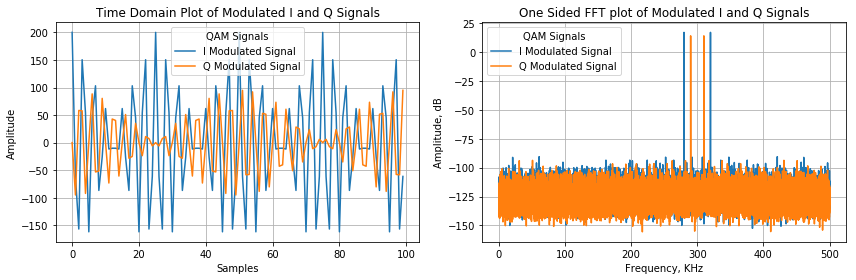

In [9]:
c1_fft_db = find_fft(c1, n_window)
c2_fft_db = find_fft(c2, n_window)

time_title = 'Time Domain Plot of Modulated I and Q Signals'
freq_title = 'One Sided FFT plot of Modulated I and Q Signals'
label_I = 'I Modulated Signal'
label_Q = 'Q Modulated Signal'
legend_title = 'QAM Signals'

multi_subplots(c1, c2, c1_fft_db, c2_fft_db, samples, freqs, fs, time_title, freq_title, label_I, label_Q, legend_title)

These signals can then be summed together to create a single signal, $y(t)$, which contains both information signals. 

$y(t) = g_{1}(t) \cos(2 \pi f_{c} t) - g_{2}(t) \sin(2 \pi f_{c} t)$

This way, two signals can be transmitted using a bandwidth of $2f_{b}$.

Within Python, this is a simple case of summing together the two modulated signals, $c_{1}$ and $c_{2}$:

In [10]:
y = c1 + c2 # sum of modulated signals

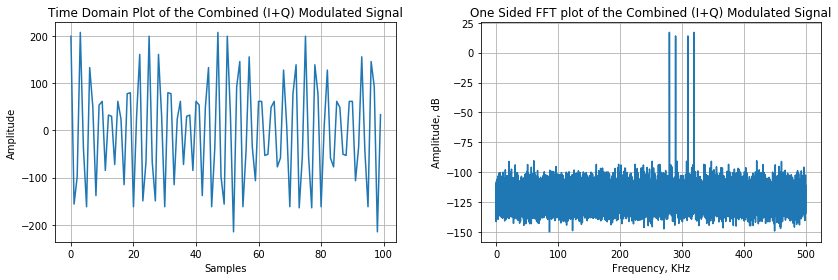

In [11]:
y_fft_db = find_fft(y, n_window)

time_title = 'Time Domain Plot of the Combined (I+Q) Modulated Signal'
freq_title = 'One Sided FFT plot of the Combined (I+Q) Modulated Signal'
subplots(y, y_fft_db, samples, freqs, fs, time_title, freq_title)

### 3.2 QAM Demodulation <a class="anchor" id="QAM_demod"></a>

At the receiver, quadrature demodulation involves multiplying the received signal by sine and cosine terms. The RF QAM receiver can be seen in [Figure 2](#fig-2).

<a class="anchor" id="fig-2"></a>
<figure>
<img src='./images/QAM_Demod.png' height='30%' width='30%'/>
    <figcaption><b>Figure 2: QAM Demodulation</b></figcaption>
</figure>

For the In Phase channel, I, the output after the demodulator is:  

$x_{1}(t) = y(t) \cos(2 \pi f_{c} t)$

$x_{1}(t) = 0.5g_{1}(t) + 0.5g_{1}(t) \cos(4 \pi f_{c} t) - 0.5g_{2}(t) \sin (4 \pi f_{c} t)$

Similarly, for the Quadrature Phase channel, Q, the output after the demodulator is:

$x_{2}(t) = y(t)( -\sin(2 \pi f_{c} t))$

$x_{2}(t) = 0.5g_{2}(t) - 0.5g_{1}(t) \sin(4 \pi f_{c} t) + 0.5g_{2}(t) \cos (4 \pi f_{c} t)$

In [12]:
x1 = y*np.cos(2*np.pi*fc*t)
x2 = y*(-np.sin(2*np.pi*fc*t))

As can be seen from the below plots, the desired baseband frequency components have been reconstructed, however as in Amplitude Modulation, unwanted high frequency components are still present in the signal.

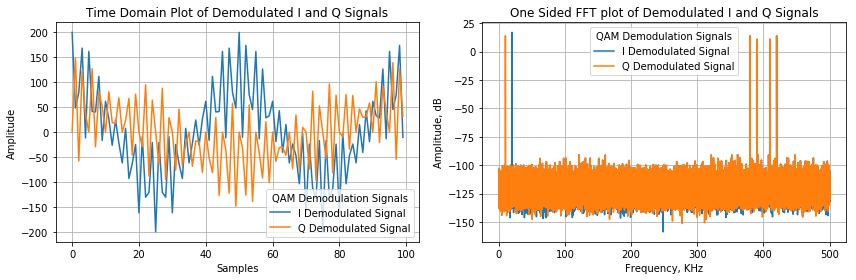

In [13]:
x1_fft_db = find_fft(x1, n_window)
x2_fft_db = find_fft(x2, n_window)

time_title = 'Time Domain Plot of Demodulated I and Q Signals'
freq_title = 'One Sided FFT plot of Demodulated I and Q Signals'
label_I = 'I Demodulated Signal'
label_Q = 'Q Demodulated Signal'
legend_title = 'QAM Demodulation Signals'

multi_subplots(x1, x2, x1_fft_db, x2_fft_db, samples, freqs, fs, time_title, freq_title, label_I, label_Q, legend_title)

Low pass filters are used to remove the high frequency terms so that the information can be perfectly recovered. 

$z_{1}(t) = 0.5g_{1}(t)$

$z_{2}(t) = 0.5g_{2}(t)$

In [14]:
f_cutoff = 0.1 # Cutoff frequency as a fraction of the sampling rate
b = 0.08  # Transition band, as a fraction of the sampling rate (in (0, 0.5)).

N = int(np.ceil((4 / b)))
if not N % 2: N += 1  # N is odd.
n = np.arange(N)

h = np.sinc(2 * f_cutoff * (n - (N - 1) / 2)) # Compute sinc filter.
w = np.blackman(N) # Compute Blackman window.
h = h * w # Multiply sinc filter by window.
h = h / np.sum(h) # Normalize to get unity gain.

In [15]:
z1 = np.convolve(x1, h)
z2 = np.convolve(x2, h)

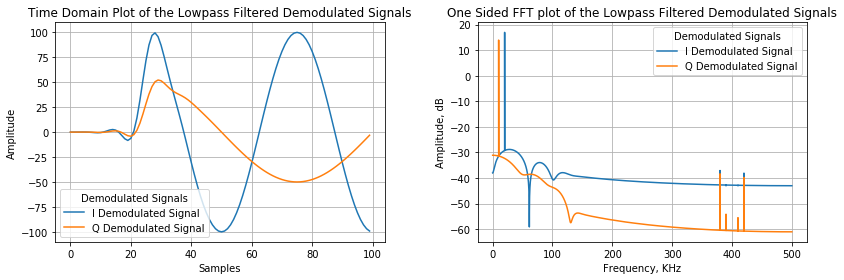

In [16]:
z1_fft_db = find_fft(z1, n_window)
z2_fft_db = find_fft(z2, n_window)

time_title = 'Time Domain Plot of the Lowpass Filtered Demodulated Signals'
freq_title = 'One Sided FFT plot of the Lowpass Filtered Demodulated Signals'
label_I = 'I Demodulated Signal'
label_Q = 'Q Demodulated Signal'
legend_title = 'Demodulated Signals'

multi_subplots(z1, z2, z1_fft_db, z2_fft_db, samples, freqs, fs, time_title, freq_title, label_I, label_Q, legend_title)

### 3.3 Phase Error With QAM <a class="anchor" id="QAM_phase_error"></a>

If the receivers local oscillator is shifted by $\theta$ with respect to the received signal, then the In Phase and Quadrature output signals will be mixed. 

For the I channel:

$x_{1}(t) = y(t) \cos(2 \pi f_{c} t + \theta)$

$x_{1}(t) = 0.5 [g_{1}t \cos(\theta) + g_{2}(t) \sin(\theta)]$

For the Q channel:

$x_{2}(t) = y(t) (-\sin(2 \pi f_{c} t + \theta))$

$x_{2}(t) = 0.5 [-g_{1}t \sin(\theta) + g_{2}(t) \cos(\theta)]$

In [19]:
phaseshift = (np.pi/3) #60 degree phase shift

x1_phaseshift = y*np.cos(2*np.pi*fc*t + phaseshift)
x2_phaseshift = y*(-np.sin(2*np.pi*fc*t + phaseshift))

lp_x1_phaseshift = np.convolve(x1_phaseshift, h)
lp_x2_phaseshift = np.convolve(x2_phaseshift, h)

From the below plots it is clear that frequency components from $g_{1}(t)$ and $g_{2}(t)$ are present in both I and Q channels. The time domain plot also shows these mixed signals, the clear 90 degree phase shifts seen earlier are no longer presents and the signals can be seen to be composed of multiple components.

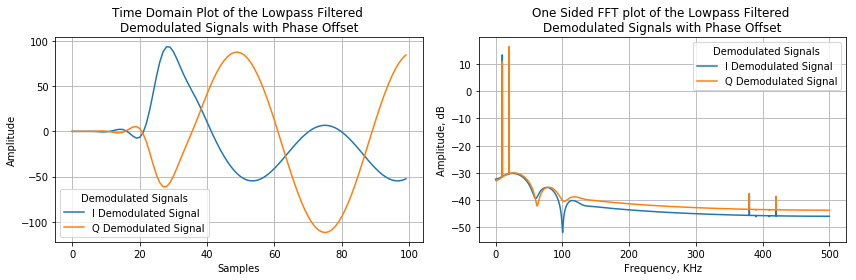

In [20]:
lp_x1_phaseshift_fft_db = find_fft(lp_x1_phaseshift, n_window)
lp_x2_phaseshift_fft_db = find_fft(lp_x2_phaseshift, n_window)

time_title = 'Time Domain Plot of the Lowpass Filtered \nDemodulated Signals with Phase Offset'
freq_title = 'One Sided FFT plot of the Lowpass Filtered \nDemodulated Signals with Phase Offset'
label_I = 'I Demodulated Signal'
label_Q = 'Q Demodulated Signal'
legend_title = 'Demodulated Signals'

multi_subplots(lp_x1_phaseshift, lp_x2_phaseshift, lp_x1_phaseshift_fft_db, lp_x2_phaseshift_fft_db, samples, freqs, fs,
            time_title, freq_title, label_I, label_Q, legend_title)

The I and Q signals are interfering with each other due to the phase error. DSP receivers can be designed to calculate these phase errors and unmix the signals. 

Through this notebook we have explored the QAM modulation scheme and how it can be used to transmit two information signals using a single carrier, improving the bandwidth efficiency of a system. In the next notebook, we will explore a complex representation of the QAM scheme, and how this can be simpler to represent and implement.

[⬅️ Previous Notebook](02_amplitude_modulation.ipynb) | | [Next Notebook ➡️](04_complex_QAM.ipynb)

----
----